# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#creates dataframe for cities weather data and saves cvs
cities_df = pd.DataFrame(cities)


cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df.rename(columns={ cities_df.columns[0]: "City" }, inplace = True)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,,,,,,,,
1,zhezkazgan,,,,,,,,
2,saleaula,,,,,,,,
3,barrow,,,,,,,,
4,asau,,,,,,,,
...,...,...,...,...,...,...,...,...,...
608,santa rosalia,,,,,,,,
609,goma,,,,,,,,
610,hit,,,,,,,,
611,palabuhanratu,,,,,,,,


In [29]:
#set static parameter for api key
params={
    "appid": weather_api_key
}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
#loop to loop through the city parameter and add Lat,Lng,MaxTemp,Humidity, cloudiness,windspeed,country and date
for index, row in cities_df.iterrows():
    city = row.City
        
    params["q"] = city
    
    cities_lat_lng = requests.get(base_url,params).json()
    print(f"Processing record {index} | {city}")
    try:
        cities_df.loc[index,'Lat'] = cities_lat_lng['coord']['lat']
        cities_df.loc[index,'Lng'] = cities_lat_lng['coord']['lon']
        cities_df.loc[index,'Max Temp'] = cities_lat_lng['main']['temp_max']
        cities_df.loc[index,'Humidity'] = cities_lat_lng['main']['humidity']
        cities_df.loc[index,'Cloudiness'] = cities_lat_lng['clouds']['all']
        cities_df.loc[index,'Wind Speed'] = cities_lat_lng['wind']['speed']
        cities_df.loc[index,'Country'] = cities_lat_lng['sys']['country']
        cities_df.loc[index,'Date'] = cities_lat_lng['dt']
    #also for cities not found in the open weather to be skipped and show progress
    except (KeyError, SyntaxError):
           print("City not found. Skipping...")

Processing record 0 | pangnirtung
Processing record 1 | zhezkazgan
Processing record 2 | saleaula
City not found. Skipping...
Processing record 3 | barrow
Processing record 4 | asau
Processing record 5 | nouadhibou
Processing record 6 | albany
Processing record 7 | hermanus
Processing record 8 | roebourne
Processing record 9 | ribeira grande
Processing record 10 | cidreira
Processing record 11 | hobart
Processing record 12 | rikitea
Processing record 13 | lebu
Processing record 14 | vaini
Processing record 15 | tiksi
Processing record 16 | ponta do sol
Processing record 17 | lima
Processing record 18 | iquitos
Processing record 19 | mar del plata
Processing record 20 | san jose
Processing record 21 | kavieng
Processing record 22 | muzhi
Processing record 23 | mabaruma
Processing record 24 | ratnagiri
Processing record 25 | lompoc
Processing record 26 | sentyabrskiy
City not found. Skipping...
Processing record 27 | varhaug
Processing record 28 | aligudarz
Processing record 29 | synya
P

Processing record 234 | ugoofaaru
Processing record 235 | kenai
Processing record 236 | topeka
Processing record 237 | namibe
Processing record 238 | iqaluit
Processing record 239 | puri
Processing record 240 | galesong
Processing record 241 | berezovyy
Processing record 242 | forestville
Processing record 243 | rawannawi
City not found. Skipping...
Processing record 244 | akdagmadeni
Processing record 245 | lorengau
Processing record 246 | gurupa
Processing record 247 | belushya guba
City not found. Skipping...
Processing record 248 | buchanan
Processing record 249 | chengmai
City not found. Skipping...
Processing record 250 | havre-saint-pierre
Processing record 251 | kilindoni
Processing record 252 | bereda
Processing record 253 | najran
Processing record 254 | bolungarvik
City not found. Skipping...
Processing record 255 | arraial do cabo
Processing record 256 | praia da vitoria
Processing record 257 | rawson
Processing record 258 | sendai
Processing record 259 | buckeye
Processing

Processing record 460 | vardo
Processing record 461 | broome
Processing record 462 | dingzhou
Processing record 463 | brenes
Processing record 464 | hamilton
Processing record 465 | xichang
Processing record 466 | waddan
Processing record 467 | sabara
Processing record 468 | tiarei
Processing record 469 | chlorakas
Processing record 470 | majene
Processing record 471 | buraydah
Processing record 472 | kampot
Processing record 473 | la carolina
Processing record 474 | patitirion
Processing record 475 | atkinson
Processing record 476 | verkhnyaya inta
Processing record 477 | aksarka
Processing record 478 | dongsheng
Processing record 479 | malakal
Processing record 480 | nerchinskiy zavod
Processing record 481 | hami
Processing record 482 | ponta delgada
Processing record 483 | nautla
Processing record 484 | meulaboh
Processing record 485 | keti bandar
Processing record 486 | zaria
Processing record 487 | takoradi
Processing record 488 | maceio
Processing record 489 | plover
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#saves output file for Weather Cities Output
cities_df.to_csv("Weather_cities_output.csv")

In [33]:
#displaying dataframe to ensure proper data was catpured
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,288.58,56,100,1.99,CA,1627675979
1,zhezkazgan,47.8043,67.7144,294.7,20,23,3.22,KZ,1627675980
2,saleaula,,,,,,,,
3,barrow,71.2906,-156.7887,284.16,87,90,3.6,US,1627675980
4,asau,46.4333,26.4,295.04,77,3,1.83,RO,1627675981


In [89]:
#checking max humidity for next step
humidity_max = cities_df['Humidity'].max()
humidity_max  

100.0

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#section skipped per instruction

In [50]:
#formating columns from object to float for plotting
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"], downcast="float")
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], downcast="float")
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"], downcast="float")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], downcast="float")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"], downcast="float")
cities_df.dtypes

City           object
Lat           float32
Lng            object
Max Temp      float32
Humidity      float32
Cloudiness    float32
Wind Speed    float32
Country        object
Date           object
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

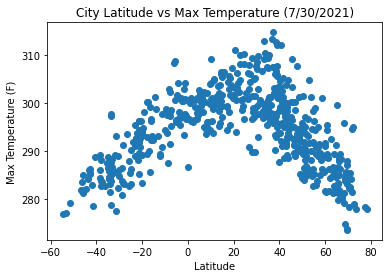

In [52]:
# Plot Latitude versus Temperature on a scatterplot
latitude = cities_df.Lat
temperature = cities_df['Max Temp']
plt.scatter(latitude,temperature)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (7/30/2021)")
plt.show()

## Latitude vs. Humidity Plot

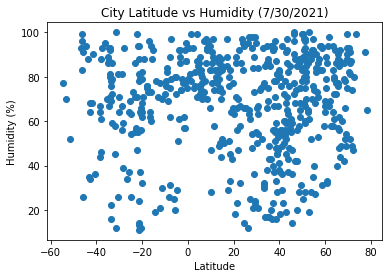

In [53]:
# Plot Latitude versus Humidity on a scatterplot
latitude = cities_df.Lat
humidity = cities_df['Humidity']
plt.scatter(latitude,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (7/30/2021)")
plt.show()

## Latitude vs. Cloudiness Plot

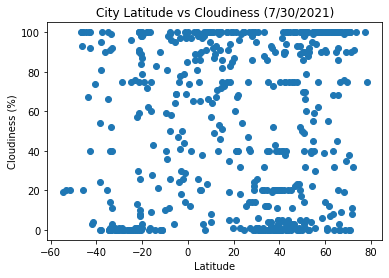

In [54]:
# Plot Latitude versus Cloudiness on a scatterplot
latitude = cities_df.Lat
cloudiness = cities_df['Cloudiness']
plt.scatter(latitude,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (7/30/2021)")
plt.show()

## Latitude vs. Wind Speed Plot

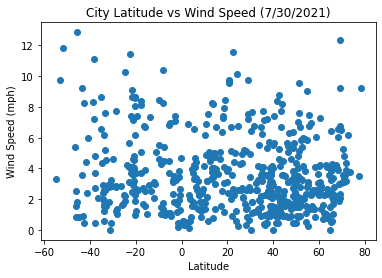

In [56]:
# Plot Latitude versus Wind Speed on a scatterplot
latitude = cities_df.Lat
wind_speed = cities_df['Wind Speed']
plt.scatter(latitude,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (7/30/2021)")
plt.show()

## Linear Regression

In [90]:
#sorting main dataframe into northern and southern dataframes
northern_latitude_df = cities_df.loc[(cities_df['Lat'] > 0)]
southern_latitude_df = cities_df.loc[(cities_df['Lat'] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4445560600725897


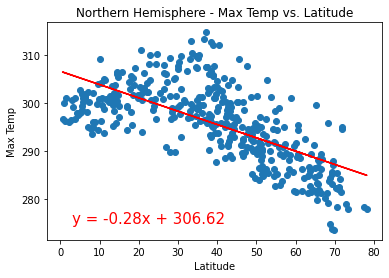

In [73]:
# Northern Hemisphere - Max Temp vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,275),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6468682617767053


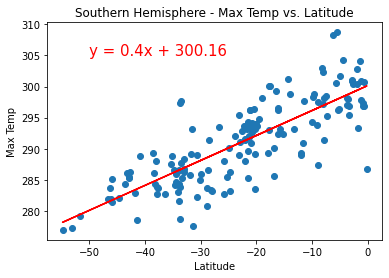

In [75]:
# Southern Hemisphere - Max Temp vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006702809257963986


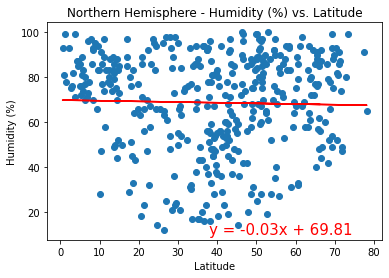

In [78]:
# Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.652791870715505e-05


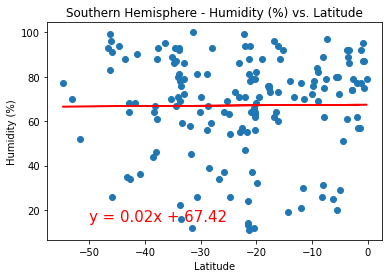

In [80]:
# Southern Hemisphere - Humidity (%) vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000615524402346641


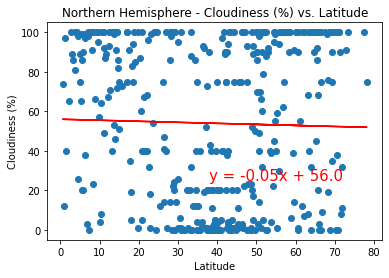

In [83]:
# Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01595584317070153


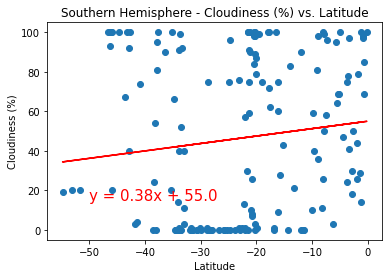

In [84]:
# Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.2064612795910764e-05


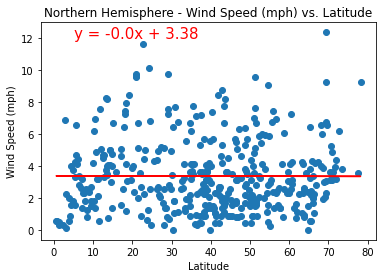

In [86]:
# Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

x_values = northern_latitude_df['Lat']
y_values = northern_latitude_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011345198414329497


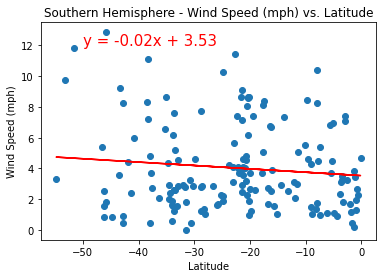

In [88]:
# Southern Hemisphere - Wind Speed vs Latitude Linear Regression

x_values = southern_latitude_df['Lat']
y_values = southern_latitude_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()